                                    #  Movie_Recomendation_Unsupervised_Learning                                   

Techniques:
**K-Means:** For simple, efficient clustering.

**K-Means:** For simple, efficient clustering.

**DBSCAN:** To find arbitrarily shaped clusters and identify outliers.

**Hierarchical Clustering:** To visualize the natural hierarchy of segments.

**Data Needed:** Customer transaction history, purchase frequency, average basket size, website activity (pages viewed, time spent), and demographics (if available).

**Expected Output:** Defined customer groups (e.g., "High-Value Loyalists," "Occasional Bargain Hunters," "New Engaged Users"). This output can directly inform marketing and product strategy.

# Import Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load The dataset 

In [2]:
df_netflix = pd.read_csv('https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/Netflix_titles.csv')
df_amazon = pd.read_csv('https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/Amazone_titles.csv')
df_hbo = pd.read_csv('https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/HBO_titles.csv')

In [3]:
df = pd.concat([df_netflix, df_amazon, df_hbo], axis=0)

# Data Preprocessing

In [4]:
df_netflix.shape, df_amazon.shape, df_hbo.shape, df.shape

((5850, 15), (9871, 15), (3294, 15), (19015, 15))

In [5]:
df.shape

(19015, 15)

# Check for missing values and duplicates

In [6]:
df.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [7]:
df.duplicated().sum()

np.int64(35)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

No Duplicate values found

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18980 entries, 0 to 3293
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18980 non-null  object 
 1   title                 18979 non-null  object 
 2   type                  18980 non-null  object 
 3   description           18831 non-null  object 
 4   release_year          18980 non-null  int64  
 5   age_certification     8684 non-null   object 
 6   runtime               18980 non-null  int64  
 7   genres                18980 non-null  object 
 8   production_countries  18980 non-null  object 
 9   seasons               4208 non-null   float64
 10  imdb_id               17586 non-null  object 
 11  imdb_score            17107 non-null  float64
 12  imdb_votes            17070 non-null  float64
 13  tmdb_popularity       18310 non-null  float64
 14  tmdb_score            16324 non-null  float64
dtypes: float64(5), int64(2), 

Handle Columns

In [11]:
df.drop(columns=['description','age_certification'], inplace=True)

In [12]:
df.isnull().sum()

id                          0
title                       1
type                        0
release_year                0
runtime                     0
genres                      0
production_countries        0
seasons                 14772
imdb_id                  1394
imdb_score               1873
imdb_votes               1910
tmdb_popularity           670
tmdb_score               2656
dtype: int64

In [13]:
df= df.dropna(subset=['title'])

In [14]:
df.isnull().sum()

id                          0
title                       0
type                        0
release_year                0
runtime                     0
genres                      0
production_countries        0
seasons                 14771
imdb_id                  1394
imdb_score               1872
imdb_votes               1909
tmdb_popularity           669
tmdb_score               2655
dtype: int64

In [15]:
df.head(10)

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,1976,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,1969,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,1971,102,"['thriller', 'action', 'crime']",['US'],NaN,tt0066999,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,1967,110,"['crime', 'drama', 'action']",['US'],NaN,tt0061418,7.7,112048.0,15.687,7.500
9,tm98978,The Blue Lagoon,MOVIE,1980,104,"['romance', 'action', 'drama']",['US'],NaN,tt0080453,5.8,69844.0,50.324,6.156


# 1. Remove unwanted characters from the 'production_countries' column

In [16]:
df

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,1976,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,tm1082718,Romeo Santos: Utopia Live from MetLife Stadium,MOVIE,2021,103,"['romance', 'music']",['PR'],NaN,NaN,NaN,NaN,8.425,8.100
3290,tm1067128,Algo Azul,MOVIE,2021,90,['comedy'],['PA'],NaN,tt9257620,5.9,50.0,1.400,2.000
3291,tm1121489,Entre Nos: What She Said,MOVIE,2021,28,['comedy'],[],NaN,tt15532762,NaN,NaN,NaN,NaN
3292,tm1121486,Entre Nos: The Winners 2,MOVIE,2021,28,['comedy'],[],NaN,tt15532736,NaN,NaN,NaN,NaN


In [17]:
df['production_countries']

0             ['US']
1             ['US']
2             ['US']
3             ['GB']
4       ['GB', 'US']
            ...     
3289          ['PR']
3290          ['PA']
3291              []
3292              []
3293          ['US']
Name: production_countries, Length: 18979, dtype: object

In [18]:
# we will remove all brackets and quotes from the production_countries column
# The .str.replace() method is used to remove '[' and ']' characters, and any single quotes
# The 'regex=True' flag allows the .str.replace() method to interpret the patterns as regular expressions.

df['production_countries'] = df['production_countries'].str.replace(r"[\[\]']", '', regex=True).str.replace(r"[\[\]']", '', regex=True)

In [19]:
df['production_countries']

0           US
1           US
2           US
3           GB
4       GB, US
         ...  
3289        PR
3290        PA
3291          
3292          
3293        US
Name: production_countries, Length: 18979, dtype: object

We need only one first country and remove other countries

In [20]:
df['production_countries'] = df['production_countries'].str.split(',').str[0]

In [21]:
df['production_countries']

0       US
1       US
2       US
3       GB
4       GB
        ..
3289    PR
3290    PA
3291      
3292      
3293    US
Name: production_countries, Length: 18979, dtype: object

In [22]:
df

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,51,['documentation'],US,1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,1976,114,"['drama', 'crime']",US,NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",US,NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",GB,NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']",GB,NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,tm1082718,Romeo Santos: Utopia Live from MetLife Stadium,MOVIE,2021,103,"['romance', 'music']",PR,NaN,NaN,NaN,NaN,8.425,8.100
3290,tm1067128,Algo Azul,MOVIE,2021,90,['comedy'],PA,NaN,tt9257620,5.9,50.0,1.400,2.000
3291,tm1121489,Entre Nos: What She Said,MOVIE,2021,28,['comedy'],,NaN,tt15532762,NaN,NaN,NaN,NaN
3292,tm1121486,Entre Nos: The Winners 2,MOVIE,2021,28,['comedy'],,NaN,tt15532736,NaN,NaN,NaN,NaN


### Working with genres column

In [23]:
df['genres']

0                                 ['documentation']
1                                ['drama', 'crime']
2       ['drama', 'action', 'thriller', 'european']
3                   ['fantasy', 'action', 'comedy']
4                                 ['war', 'action']
                           ...                     
3289                           ['romance', 'music']
3290                                     ['comedy']
3291                                     ['comedy']
3292                                     ['comedy']
3293                              ['documentation']
Name: genres, Length: 18979, dtype: object

Remove Brackets and Quotes from genres column and also we keep only first genre and remove other genres

In [24]:
df['genres'] = df['genres'].str.replace(r"[\[\]']", '', regex=True).str.replace(r"[\[\]']", '', regex=True)

In [25]:
df['genres'] = df['genres'].str.split(',').str[0]

In [26]:
df['genres']

0       documentation
1               drama
2               drama
3             fantasy
4                 war
            ...      
3289          romance
3290           comedy
3291           comedy
3292           comedy
3293    documentation
Name: genres, Length: 18979, dtype: object

# Handle Missing Values

In [27]:
df.isnull().sum()

id                          0
title                       0
type                        0
release_year                0
runtime                     0
genres                      0
production_countries        0
seasons                 14771
imdb_id                  1394
imdb_score               1872
imdb_votes               1909
tmdb_popularity           669
tmdb_score               2655
dtype: int64

In [28]:
df.shape

(18979, 13)

In [29]:
df.drop(['id', 'imdb_id'], axis=1, inplace=True)

In [30]:
df

,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,SHOW,1945,51,documentation,US,1.0,NaN,NaN,0.600,NaN
1,Taxi Driver,MOVIE,1976,114,drama,US,NaN,8.2,808582.0,40.965,8.179
2,Deliverance,MOVIE,1972,109,drama,US,NaN,7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,MOVIE,1975,91,fantasy,GB,NaN,8.2,534486.0,15.461,7.811
4,The Dirty Dozen,MOVIE,1967,150,war,GB,NaN,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...
3289,Romeo Santos: Utopia Live from MetLife Stadium,MOVIE,2021,103,romance,PR,NaN,NaN,NaN,8.425,8.100
3290,Algo Azul,MOVIE,2021,90,comedy,PA,NaN,5.9,50.0,1.400,2.000
3291,Entre Nos: What She Said,MOVIE,2021,28,comedy,,NaN,NaN,NaN,NaN,NaN
3292,Entre Nos: The Winners 2,MOVIE,2021,28,comedy,,NaN,NaN,NaN,NaN,NaN


In [31]:
df.isnull().sum()

title                       0
type                        0
release_year                0
runtime                     0
genres                      0
production_countries        0
seasons                 14771
imdb_score               1872
imdb_votes               1909
tmdb_popularity           669
tmdb_score               2655
dtype: int64

In [32]:
df['seasons'] = df['seasons'].fillna(1)

In [33]:
df.isnull().sum()

title                      0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_score              1872
imdb_votes              1909
tmdb_popularity          669
tmdb_score              2655
dtype: int64

# we will fill median value for numerical columns and mode for categorical columns

In [34]:
df['imdb_score'] = df['imdb_score'].fillna(df['imdb_score'].median())

In [35]:
df['imdb_votes'] = df['imdb_votes'].fillna(df['imdb_votes'].median())

In [36]:
df['tmdb_popularity'] = df['tmdb_popularity'].fillna(df['tmdb_popularity'].median())

In [37]:
df['tmdb_score'] = df['tmdb_score'].fillna(df['tmdb_score'].median())

In [38]:
df['tmdb_score'] = df['tmdb_score'].fillna(df['tmdb_score'].median())

In [39]:
# Final check after handling missing values
print("Missing values after cleaning:")
print(df.isnull().sum())
print(f"\nDataset ready for clustering: {df.shape}")

# Verify no missing values remain
assert df.isnull().sum().sum() == 0, "Still have missing values!"
print("✅ All missing values handled successfully!")

Missing values after cleaning:
title                   0
type                    0
release_year            0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

Dataset ready for clustering: (18979, 11)
✅ All missing values handled successfully!


In [40]:
df.shape

(18979, 11)

In [41]:
# Set the 'title' column as the DataFrame index
df.set_index('title', inplace=True)

# Encode the categorical columns

In [42]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn import datasets

# Implement one hot encoding for categorical columns

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18979 entries, Five Came Back: The Reference Films to The Infamous Future
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  18979 non-null  object 
 1   release_year          18979 non-null  int64  
 2   runtime               18979 non-null  int64  
 3   genres                18979 non-null  object 
 4   production_countries  18979 non-null  object 
 5   seasons               18979 non-null  float64
 6   imdb_score            18979 non-null  float64
 7   imdb_votes            18979 non-null  float64
 8   tmdb_popularity       18979 non-null  float64
 9   tmdb_score            18979 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.6+ MB


# Step 1: Create Dummy Variables

In [44]:
dummies = pd.get_dummies(df[['type', 'production_countries', 'genres']], drop_first=True)

# Step 2: Concatenate with Original DataFrame

In [45]:
df = pd.concat([df, dummies], axis=1)

# Drop Original Categorical Columns 

In [46]:
df.drop(['type', 'production_countries', 'genres'], axis=1, inplace=True)

In [47]:
df

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,type_SHOW,production_countries_AE,production_countries_AF,...,genres_history,genres_horror,genres_music,genres_reality,genres_romance,genres_scifi,genres_sport,genres_thriller,genres_war,genres_western
title,,,,,,,,,,,,,,,,,,,,,
Five Came Back: The Reference Films,1945,51,1.0,6.4,1116.5,0.600,6.500,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Taxi Driver,1976,114,1.0,8.2,808582.0,40.965,8.179,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Deliverance,1972,109,1.0,7.7,107673.0,10.010,7.300,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Monty Python and the Holy Grail,1975,91,1.0,8.2,534486.0,15.461,7.811,False,False,False,...,False,False,False,False,False,False,False,False,False,False
The Dirty Dozen,1967,150,1.0,7.7,72662.0,20.398,7.600,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Romeo Santos: Utopia Live from MetLife Stadium,2021,103,1.0,6.4,1116.5,8.425,8.100,False,False,False,...,False,False,False,False,True,False,False,False,False,False
Algo Azul,2021,90,1.0,5.9,50.0,1.400,2.000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Entre Nos: What She Said,2021,28,1.0,6.4,1116.5,4.034,6.500,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Scaling (Min-Max Scaler)

In [48]:
# scale the data in min max range for better clustering
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled
df_scaled.shape

(18979, 152)

In [49]:
df_scaled

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,type_SHOW,production_countries_AE,production_countries_AF,...,genres_history,genres_horror,genres_music,genres_reality,genres_romance,genres_scifi,genres_sport,genres_thriller,genres_war,genres_western
0,0.363636,0.092896,0.0,0.602273,0.000435,0.000135,0.631579,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.619835,0.207650,0.0,0.806818,0.316407,0.009210,0.808316,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.586777,0.198543,0.0,0.750000,0.042132,0.002251,0.715789,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.611570,0.165756,0.0,0.806818,0.209149,0.003476,0.769579,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.545455,0.273224,0.0,0.750000,0.028432,0.004586,0.747368,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,0.991736,0.187614,0.0,0.602273,0.000435,0.001894,0.800000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18975,0.991736,0.163934,0.0,0.545455,0.000018,0.000315,0.157895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18976,0.991736,0.051002,0.0,0.602273,0.000435,0.000907,0.631579,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18977,0.991736,0.051002,0.0,0.602273,0.000435,0.000907,0.631579,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# DBSCAN Clustering Algorithm

### Define the range of epsilon (eps) and minimum samples (min_samples) parameters for DBSCAN

In [50]:
eps_array = [0.2, 0.5, 1]
 # List of different epsilon values (the maximum distance between two samples for one to be considered as in the neighborhood of the other)
min_samples_array = [5, 10, 30]
# List of different min_samples values (the number of samples in a neighborhood for a point to be considered as a core point)

# Itrate over each combination of eps and min_samples
for eps in eps_array:
    for min_samples in min_samples_array:
        # Test all 9 combinations:
        # (0.2, 5), (0.2, 10), (0.2, 30)
        # (0.5, 5), (0.5, 10), (0.5, 30)  
        # (1.0, 5), (1.0, 10), (1.0, 30)
        # ------------------------------------------------------------------
        # # dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        # # # Evaluate each combination
        # # clusters = dbscan.fit_predict(df_scaled)
        # # n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        # # n_noise = list(clusters).count(-1)
        
        # # if n_clusters > 1:  # Silhouette score is only defined for n_clusters > 1
        # #     silhouette_avg = silhouette_score(df_scaled, clusters)
        # #     print(f"eps: {eps}, min_samples: {min_samples} => clusters: {n_clusters}, noise points: {n_noise}, silhouette score: {silhouette_avg:.4f}")
        # # else:
        # #     print(f"eps: {eps}, min_samples: {min_samples} => clusters: {n_clusters}, noise points: {n_noise}, silhouette score: N/A (only one cluster)")
        # ----------------------------------------------------------------------

          # Initialize and fit the DBSCAN model with the current parameters
        clusterer = DBSCAN(eps=eps, min_samples=min_samples).fit(df_scaled)

        # Retrieve the cluster labels from the fitted model
        cluster_labels = clusterer.labels_

         # Check if the algorithm found only one cluster or marked all points as noise (-1 label for noise)
        if len(set(cluster_labels)) == 1:
            continue  # Skip silhouette score calculation for this iteration

        # Calculate the silhouette score to evalute the clustering quality
        silhouette_avg = silhouette_score(df_scaled, cluster_labels)

        # print the current parameters and the corresponding silhouette score
        print("For eps =", eps, 
              "and min_samples =", min_samples, 
              "Count clusters =", len(set(cluster_labels)),
              "The average silhouette_score is :", silhouette_avg)



For eps = 0.2 and min_samples = 5 Count clusters = 317 The average silhouette_score is : 0.5838796350156643
For eps = 0.2 and min_samples = 10 Count clusters = 181 The average silhouette_score is : 0.5145222026885451
For eps = 0.2 and min_samples = 30 Count clusters = 68 The average silhouette_score is : 0.3607520743263381
For eps = 0.5 and min_samples = 5 Count clusters = 362 The average silhouette_score is : 0.6439972678353402
For eps = 0.5 and min_samples = 10 Count clusters = 225 The average silhouette_score is : 0.5889638416327622
For eps = 0.5 and min_samples = 30 Count clusters = 95 The average silhouette_score is : 0.45632046673608384
For eps = 1 and min_samples = 5 Count clusters = 359 The average silhouette_score is : 0.5929859616439396
For eps = 1 and min_samples = 10 Count clusters = 221 The average silhouette_score is : 0.5419270410558585
For eps = 1 and min_samples = 30 Count clusters = 91 The average silhouette_score is : 0.42205179421272343


# DBSCAN With Best Hyperparameters (eps=1, minpnts=5)

In [51]:
dbscan_model = DBSCAN(eps=1, min_samples=5).fit(df_scaled)
print("For eps =", 1,
      "For min_samples =", 5,
      "Count clusters =", len(set(dbscan_model.labels_)),
      "The average silhouette_score is :", silhouette_score(df_scaled, dbscan_model.labels_))

For eps = 1 For min_samples = 5 Count clusters = 359 The average silhouette_score is : 0.5929859616439396


In [52]:
dbscan_model = DBSCAN(eps=0.5, min_samples=5).fit(df_scaled)
print("For eps =", 0.5,
      "For min_samples =", 5,
      "Count clusters =", len(set(dbscan_model.labels_)),
      "The average silhouette_score is :", silhouette_score(df_scaled, dbscan_model.labels_))

For eps = 0.5 For min_samples = 5 Count clusters = 362 The average silhouette_score is : 0.6439972678353402


# Save the cluster for recommendation

In [53]:
df['dbscan_cluster'] = dbscan_model.labels_

In [54]:
df['dbscan_cluster'].value_counts()

dbscan_cluster
 1      1621
 11     1504
-1      1305
 89      884
 6       829
        ... 
 132       5
 279       5
 283       5
 62        5
 284       5
Name: count, Length: 362, dtype: int64

# Movie recommendation based on cluster

#### Our data is ready to use the clustering results to try and recommend a movie by the name of the one you like

In [55]:
import random

def recommend_movie(movie_name: str):
    # Convert the input movie name to lowercase for case-insensitive matching
    movie_name = movie_name.lower()

    # Create a new column 'name' with lowercase movie names for comparison
    df['name'] = df.index.str.lower()

    # Find the movie that matches the input name
    movie = df[df['name'].str.contains(movie_name, na=False)]

    if not movie.empty:
        # Get the cluster label of the input movie
        cluster = movie['dbscan_cluster'].values[0]

        # Get all movies in the same cluster
        cluster_movies = df[df['dbscan_cluster'] == cluster]

        # If there are more than 5 movies in the cluster, randomly select 5
        if len(cluster_movies) >= 5:
            recommended_movies = random.sample(list(cluster_movies.index), 5)
        else:
            # If fewer than 5, return all the movies in the cluster
            recommended_movies = list(cluster_movies.index)

        # Print the recommended movies
        print('--- We can recommend you these movies ---')
        for m in recommended_movies:
            print(m)
    else:
        print('Movie not found in the database.')


# Create a Clusters Visulization

Visualizing clusters with PCA:


C:\Users\PANDIT JI\AppData\Local\Temp\ipykernel_352\2243608608.py:78: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


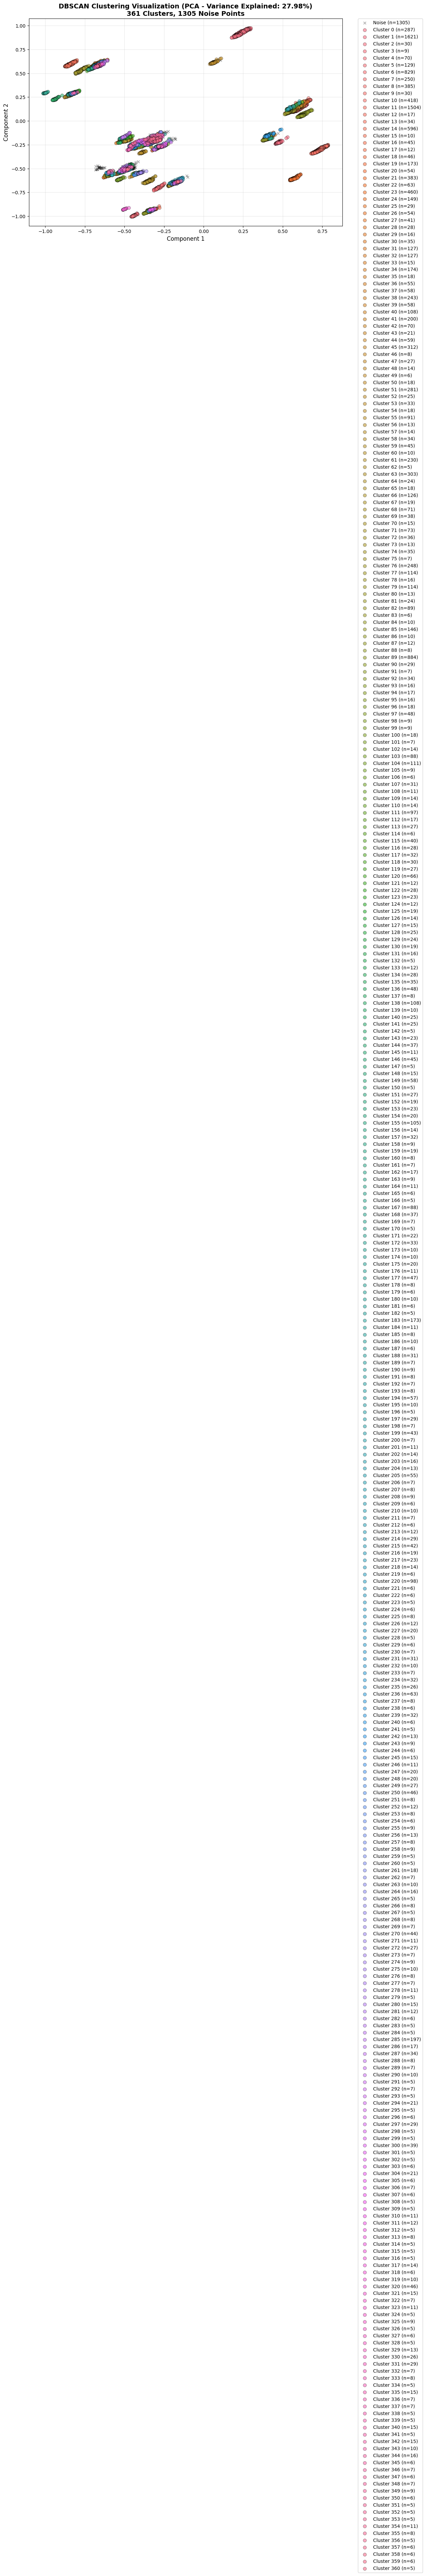


Visualizing clusters with t-SNE:


C:\Users\PANDIT JI\AppData\Local\Temp\ipykernel_352\2243608608.py:78: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


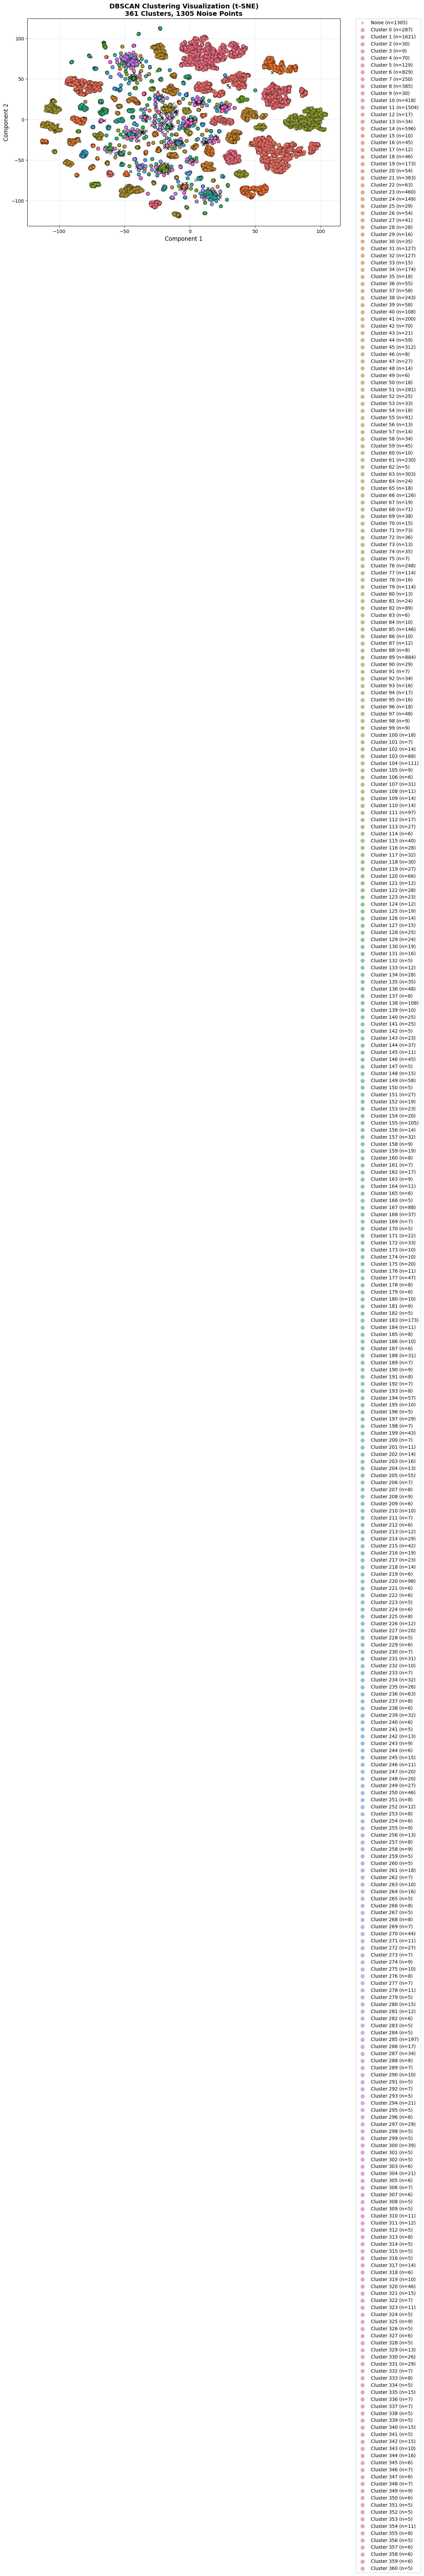

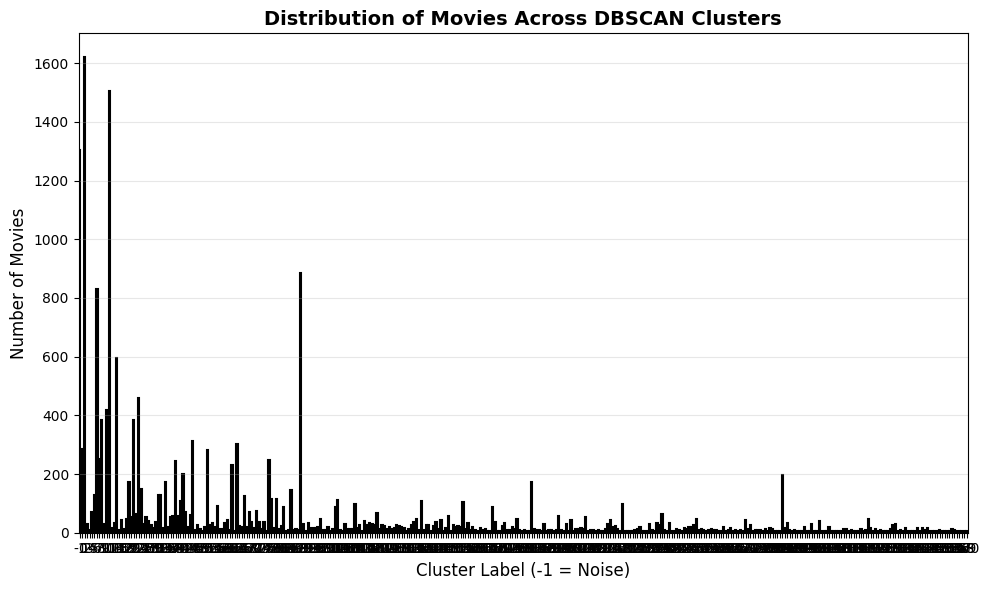

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Visualization of DBSCAN Clusters
def visualize_dbscan_clusters(df_scaled, cluster_labels, method='pca', figsize=(12, 8)):
    """
    Visualize DBSCAN clusters using dimensionality reduction
    
    Parameters:
    - df_scaled: scaled dataframe
    - cluster_labels: cluster assignments from DBSCAN
    - method: 'pca' or 'tsne' for dimensionality reduction
    - figsize: figure size tuple
    """
    
    # Dimensionality reduction to 2D
    if method == 'pca':
        reducer = PCA(n_components=2, random_state=42)
        reduced_data = reducer.fit_transform(df_scaled)
        title_suffix = f"(PCA - Variance Explained: {reducer.explained_variance_ratio_.sum():.2%})"
    else:  # tsne
        reducer = TSNE(n_components=2, random_state=42, perplexity=30)
        reduced_data = reducer.fit_transform(df_scaled)
        title_suffix = "(t-SNE)"
    
    # Create DataFrame for plotting
    plot_df = pd.DataFrame({
        'Component 1': reduced_data[:, 0],
        'Component 2': reduced_data[:, 1],
        'Cluster': cluster_labels
    })
    
    # Set up the plot
    plt.figure(figsize=figsize)
    
    # Get unique clusters
    unique_clusters = sorted(set(cluster_labels))
    n_clusters = len([c for c in unique_clusters if c != -1])
    n_noise = list(cluster_labels).count(-1)
    
    # Create color palette
    colors = sns.color_palette('husl', n_colors=len(unique_clusters))
    
    # Plot each cluster
    for idx, cluster in enumerate(unique_clusters):
        if cluster == -1:
            # Noise points in black
            cluster_data = plot_df[plot_df['Cluster'] == cluster]
            plt.scatter(cluster_data['Component 1'], 
                       cluster_data['Component 2'],
                       c='black', 
                       label=f'Noise (n={len(cluster_data)})',
                       alpha=0.3,
                       s=30,
                       marker='x')
        else:
            # Regular clusters
            cluster_data = plot_df[plot_df['Cluster'] == cluster]
            plt.scatter(cluster_data['Component 1'], 
                       cluster_data['Component 2'],
                       c=[colors[idx]], 
                       label=f'Cluster {cluster} (n={len(cluster_data)})',
                       alpha=0.6,
                       s=50,
                       edgecolors='black',
                       linewidth=0.5)
    
    plt.title(f'DBSCAN Clustering Visualization {title_suffix}\n{n_clusters} Clusters, {n_noise} Noise Points', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Component 1', fontsize=12)
    plt.ylabel('Component 2', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Visualize with PCA
print("Visualizing clusters with PCA:")
visualize_dbscan_clusters(df_scaled, dbscan_model.labels_, method='pca')

# Visualize with t-SNE (optional - takes longer but often shows better separation)
print("\nVisualizing clusters with t-SNE:")
visualize_dbscan_clusters(df_scaled, dbscan_model.labels_, method='tsne')

# Additional: Plot cluster distribution
plt.figure(figsize=(10, 6))
cluster_counts = pd.Series(dbscan_model.labels_).value_counts().sort_index()
colors_bar = ['black' if x == -1 else sns.color_palette('husl', n_colors=len(cluster_counts))[i] 
              for i, x in enumerate(cluster_counts.index)]
cluster_counts.plot(kind='bar', color=colors_bar, edgecolor='black', linewidth=1.5)
plt.title('Distribution of Movies Across DBSCAN Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Cluster Label (-1 = Noise)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Now we can input a random movie name and get recommendations  

In [56]:
s = input('Enter a movie name: ')
print("\n\n")
recommend_movie(s)




--- We can recommend you these movies ---
Sin Cielo
The Fighter
Ratter
Seattle Road
Useless


In [57]:
s = input('Enter a movie name: ')
print("\n\n")
recommend_movie(s)




Movie not found in the database.


# Save Dataset

In [58]:
# df.to_csv('movie_recommendation_dbscan.csv')  # Save the DataFrame to a CSV file

# Save the model 

In [59]:
import joblib
import pickle

# Save the model
# joblib.dump(dbscan_model, 'dbscan_movie_recommendation_model.pkl')
